In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import csv
fieldnames = ['strike price', 'delta', 'time to expiry']
df = pd.read_csv('/content/drive/MyDrive/Merged and sorted/sorted_4.csv')
dates = df['Date'].value_counts()
df['i price change'] = 0
df['PE price change'] = 0
df['CE price change'] = 0
df['total OI'] = 0
df['delta'] = 0
df1 = pd.read_csv('/content/drive/MyDrive/^NSEBANK.csv')




In [ ]:
df['PE price change']=df['Open.1'] - df['Close.1']
df['CE price change']=df['Open'] - df['Close']
df['total OI'] = df['Open Int'] + df['Open Int.1']
ddf = df.copy()



In [ ]:
ddf['Expiry'] = ddf['Expiry'].replace({'29-Jul-2021':'2021-07-29'})
r = '2021-07-'
s = '-Jul-2021'
for i in range(0,2339):
  p = ddf.iloc[i,1]        ## finding the elements in the date section and slicing them to get just the number.
  q = int(p[-2:])
  for j in range(1,30):
    if ((q == j) and (j<10)): 
      t = str(0) + str(j) + s
      ddf['Date'] = ddf['Date'].replace({t:r + str(0) + str(j)})

    if ((q==j) and (j>=10)):
      u = str(j) + s 
      ddf['Date'] = ddf['Date'].replace({u:r + str(j)}) ## changed the date format >> numerical to match easily with df1 data, now will change the underlying value wala part to complete the data set.
     

 

In [ ]:
for i in df1['Date']:
  p = df1.index[df1['Date']== i ]
  for j in range(0,2339):
    if (i==ddf.iloc[j,1]):
      ddf.iloc[j,4] = df1.iloc[p[0],4]

ddf.head()



In [ ]:
p = df1.index[df1['Date'] == '2021-04-16' ]
p[0]

81

In [ ]:
## df.insert()            ## ATM OPTIONS

In [ ]:
for i in range(0,2339):
  if(ddf.iloc[i,1] =='2021-07-01') :
    print(i)
  if(ddf.iloc[i,1] =='2021-07-29') :
    print(i)




In [ ]:
for i in range(133,153):
  print(df1.iloc[i,1])


In [ ]:
df1

,Date,Open,High,Low,Close,Adj Close,Volume
0,2020-12-16,30920.349609,30932.250000,30587.099609,30698.400391,30698.400391,0.0
1,2020-12-17,30791.199219,30945.199219,30643.900391,30847.050781,30847.050781,0.0
2,2020-12-18,30841.849609,30854.050781,30374.500000,30714.650391,30714.650391,0.0
3,2020-12-21,30595.800781,30607.500000,29201.199219,29456.449219,29456.449219,0.0
4,2020-12-22,29607.500000,29711.150391,28976.750000,29625.949219,29625.949219,0.0
...,...,...,...,...,...,...,...
242,2021-12-09,37331.750000,37397.550781,36884.449219,37082.449219,37082.449219,123200.0
243,2021-12-10,37083.148438,37153.250000,36824.398438,37105.648438,37105.648438,170900.0
244,2021-12-13,37358.199219,37581.050781,36861.898438,36925.250000,36925.250000,157300.0
245,2021-12-14,36778.949219,37039.050781,36545.398438,36893.949219,36893.949219,132200.0


In [ ]:
count = 0
for i in range(1,104):
  d = 100*(df1.iat[i,4] - df1.iat[i-1,4])/(df1.iat[i-1,4])
  
  if (abs(d) > 0.75) :
    print(d,i,df1.iat[i,0])
    count = count + 1
print(count)

# in 1 entire year, nifty 50 showed less than 42 times, a index movement of more than 1%.
 



-4.09642029449465 3 2020-12-21
0.8686694225309625 5 2020-12-23
1.7364160733205067 6 2020-12-24
1.5747216066553598 7 2020-12-28
1.429848473467035 8 2020-12-29
1.6333251435125122 13 2021-01-05
1.0628478005314628 18 2021-01-12
-0.8393336941397098 21 2021-01-15
-1.3491285041098902 22 2021-01-18
1.927274070115593 23 2021-01-19
-1.0963683802475823 25 2021-01-21
-3.1679048886767434 26 2021-01-22
-2.9291553366422756 28 2021-01-27
8.25620644517511 31 2021-02-01
3.5626517811048917 32 2021-02-02
1.4315169688259288 33 2021-02-03
1.6869324586537624 34 2021-02-04
0.8762228451050833 35 2021-02-05
0.9231609979104924 36 2021-02-08
-0.7582500714157044 38 2021-02-10
0.9979745508701805 40 2021-02-12
3.315945968431826 41 2021-02-15
-0.8776507401040996 44 2021-02-18
-2.037331393664426 45 2021-02-19
-1.6305140354087437 46 2021-02-22
3.8025841985086366 48 2021-02-24
-4.775502577361907 50 2021-02-26
1.4147916160592886 51 2021-03-01
2.6774692696748734 53 2021-03-03
-1.5550758670174936 54 2021-03-04
-1.604221945

In [ ]:
count = 0
for i in range(1,104):
  d = 100*(df1.iat[i,2] - df1.iat[i,3])/(df1.iat[i-1,4])
  if (d > 1.25) :
    print(d,i,df1.iat[i,0])
    count = count + 1
print(count)

# intraday movement in nifty 50 of more than 1.25% is just 57 times out of about 300 days. 


1.5546082003255146 2 2020-12-18
4.578599342976977 3 2020-12-21
2.493173517079241 4 2020-12-22
1.6721840280556746 5 2020-12-23
1.8004999914269524 6 2020-12-24
1.2857635304083654 7 2020-12-28
1.6061923824726543 9 2020-12-30
2.6659221907311137 13 2021-01-05
1.368598980211047 14 2021-01-06
1.4072347479148721 17 2021-01-11
2.1003834562672523 18 2021-01-12
1.6551222981539317 19 2021-01-13
1.538914573451532 21 2021-01-15
2.451714867373209 22 2021-01-18
1.889239039034319 23 2021-01-19
2.6326140560560485 25 2021-01-21
3.1425828138543976 26 2021-01-22
2.194291732507677 27 2021-01-25
3.594416303226547 28 2021-01-27
2.5646778702997746 29 2021-01-28
2.8242635982334248 30 2021-01-29
7.84823268717999 31 2021-02-01
3.2317384051827616 32 2021-02-02
2.615136567599517 33 2021-02-03
3.3783152769604 34 2021-02-04
3.0278830134906283 35 2021-02-05
1.6665476139056834 36 2021-02-08
2.335218665911089 37 2021-02-09
2.216107445259538 38 2021-02-10
1.7412984238226672 40 2021-02-12
2.893460947843496 41 2021-02-15
2

In [ ]:
for i in range(1,104):
  d = 100*(df1.iat[i,4] - df1.iat[i-1,4])/(df1.iat[i-1,4])
  print(d)

0.4842284552506502
-0.4292157164066714
-4.09642029449465
0.5754257709061182
0.8686694225309625
1.7364160733205067
1.5747216066553598
1.429848473467035
-0.0620934440098915
-0.12458849545639754
nan
nan
1.6333251435125122
0.23847738101806415
0.4972014097029666
0.4011741738640577
-0.26585930170101346
1.0628478005314628
0.7286879340734187
-0.16853716107777844
-0.8393336941397098
-1.3491285041098902
1.927274070115593
0.36653866227034915
-1.0963683802475823
-3.1679048886767434
0.0999459079642986
-2.9291553366422756
0.2435235065341285
0.6825125704323861
8.25620644517511
3.5626517811048917
1.4315169688259288
1.6869324586537624
0.8762228451050833
0.9231609979104924
0.20245740819063154
-0.7582500714157044
-0.0866330716062194
0.9979745508701805
3.315945968431826
-0.557149437426714
-0.5052757717109153
-0.8776507401040996
-2.037331393664426
-1.6305140354087437
-0.3977910982912667
3.8025841985086366
0.2652760372547029
-4.775502577361907
1.4147916160592886
0.3504624291704496
2.6774692696748734
-1.5550

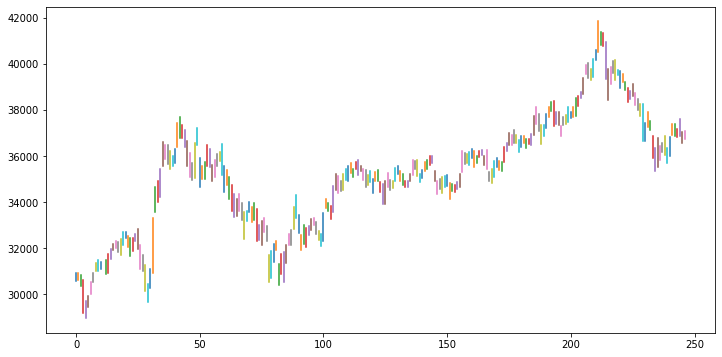

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import math

x = np.arange(0,len(df1))
fig, ax = plt.subplots(1, figsize=(12,6))
for idx, val in df1.iterrows():
    plt.plot([x[idx], x[idx]], [val['Low'], val['High']])
plt.show()